In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
from MLP import *
#from gridSearch import *
import pandas as pd
import pickle

In [20]:
tr_files=['monk_tests/monks-'+str(i+1)+'.train' for i in range(3)]
te_files=['monk_tests/monks-'+str(i+1)+'.test' for i in range(3)]

nfile=1

tr_data = pd.read_csv(tr_files[nfile],sep=' ',index_col=8).sample(frac=1)
tr_data = tr_data.drop(columns = tr_data.columns[0])
tr_data = tr_data.to_numpy()

ty = tr_data[:,0] ; ty = to_categorical(ty)
tx = tr_data[:,1:]

te_data = pd.read_csv(te_files[nfile],sep=' ',index_col=8)
te_data = te_data.drop(columns = te_data.columns[0])
te_data = te_data.to_numpy()

vy = te_data[:50,0] ; vy = to_categorical(vy)
vx = te_data[:50,1:] 

tey = te_data[50:,0] ; tey = to_categorical(tey)
tex = te_data[50:,1:] 

print(tx.shape, ty.shape)
print(vx.shape, vy.shape)

(168, 6) (168, 2)
(50, 6) (50, 2)


In [21]:
n = MLP(  Nodes=[6,10,10,2], f='relu', f_out='softmax')

final error: 0.6547619047619048


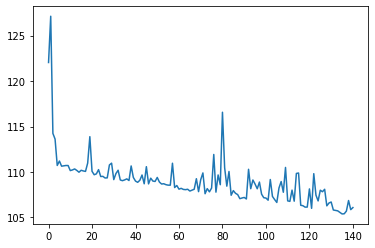

In [22]:
n.train(tx, ty, 3e-03,
  a = 9e-01,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 200,
  tresh = 0.01,
  measure_interval = 20,
  bs=20 )

plt.plot(n.loss_history)

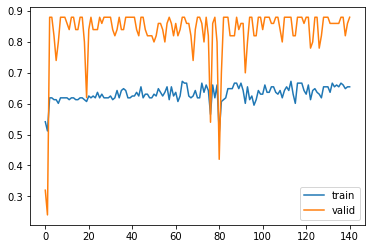

In [23]:
plt.plot(n.train_history,label = 'train')
plt.plot(n.valid_history,label = 'valid')
plt.legend()